In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv(r"C:\Users\HP\Downloads\Logistic Regression\Logistic Regression\Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data["Cabin"].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [5]:
data["Cabin"].nunique()

147

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data_new=data.drop(["PassengerId","Name","Ticket"],axis=1)
data_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


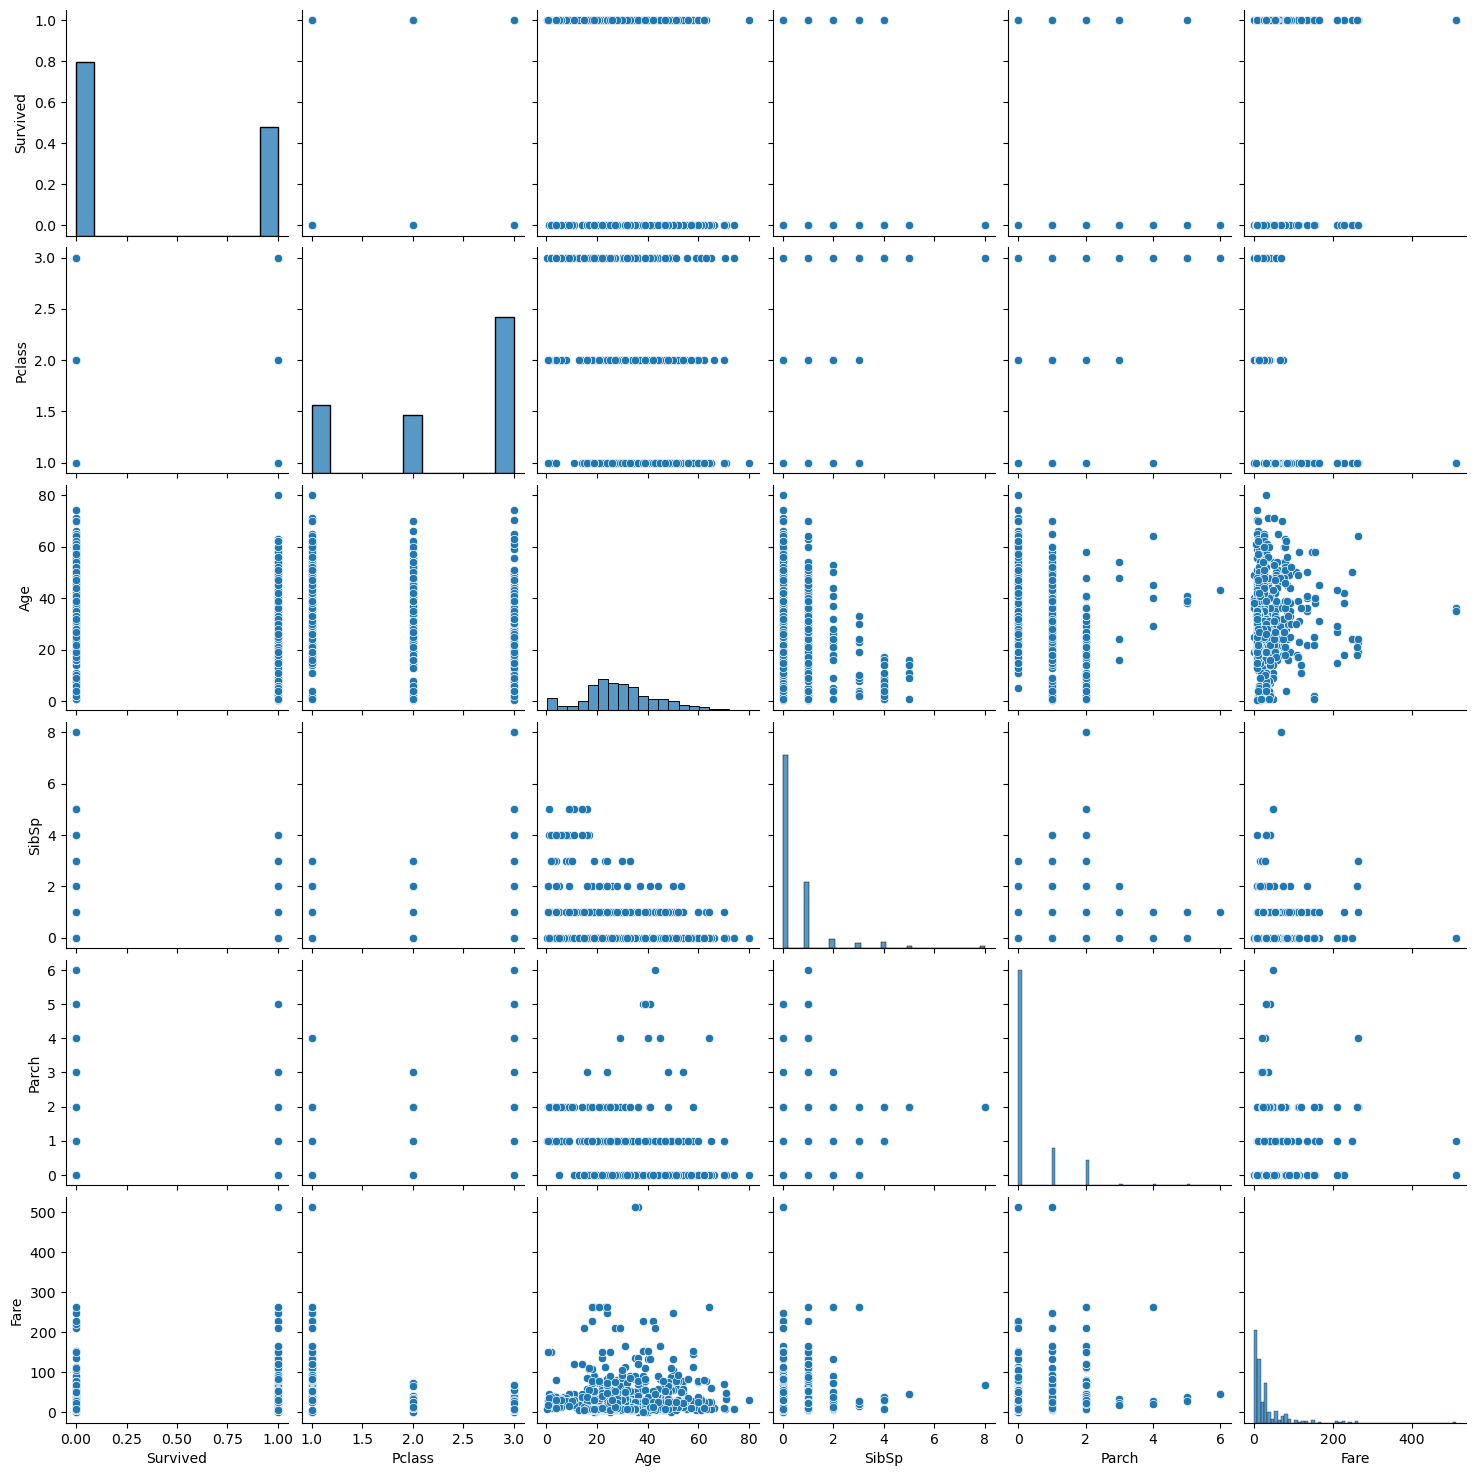

In [8]:
data_num_cols=data_new.select_dtypes(include=["int64","float64"])
sns.pairplot(data_num_cols)
plt.show()

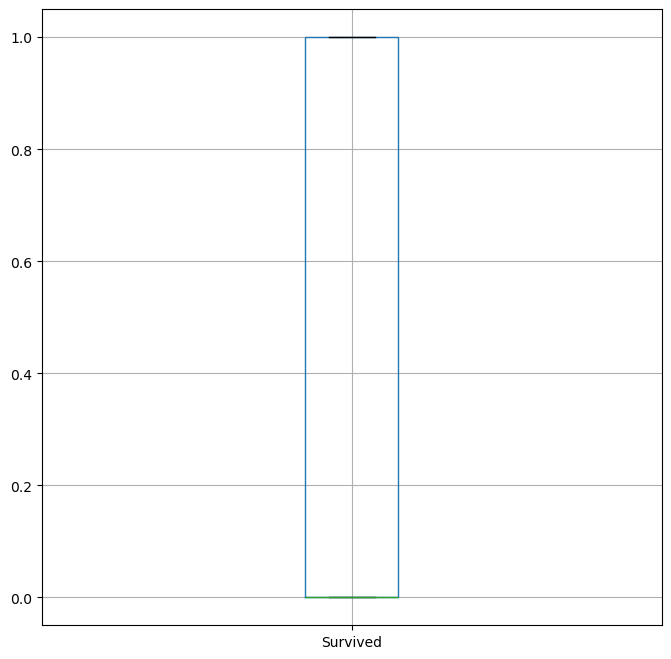

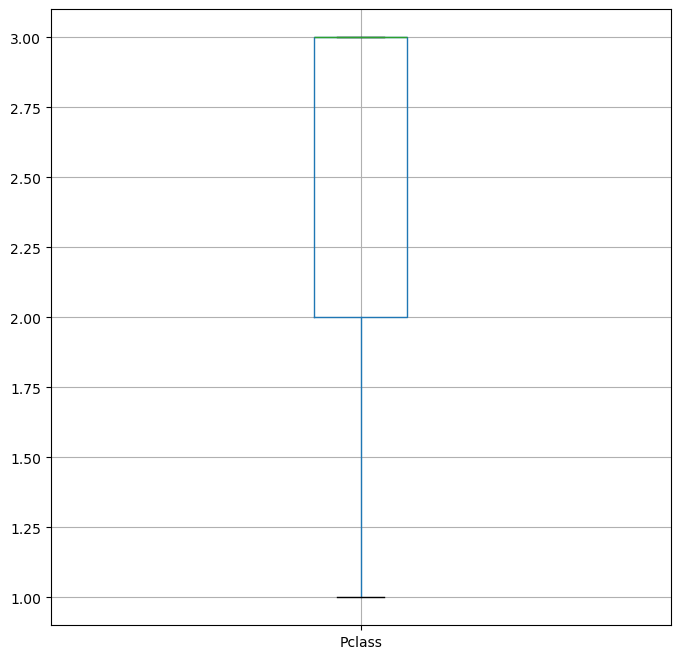

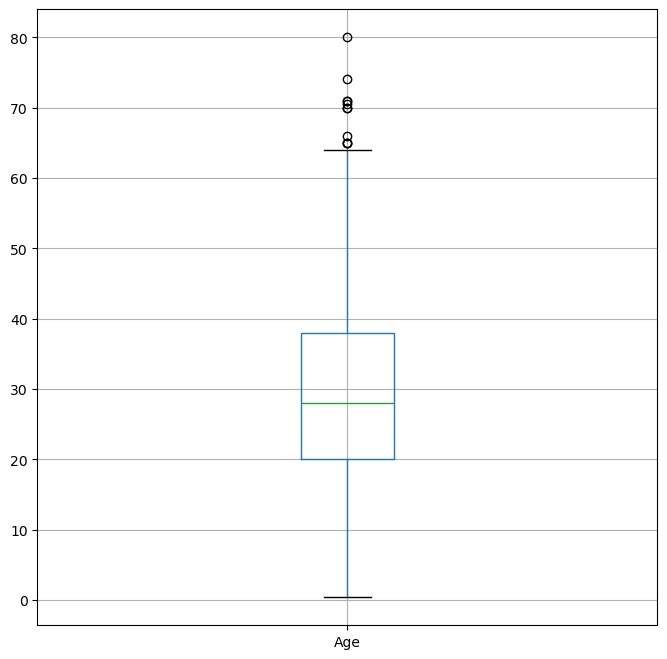

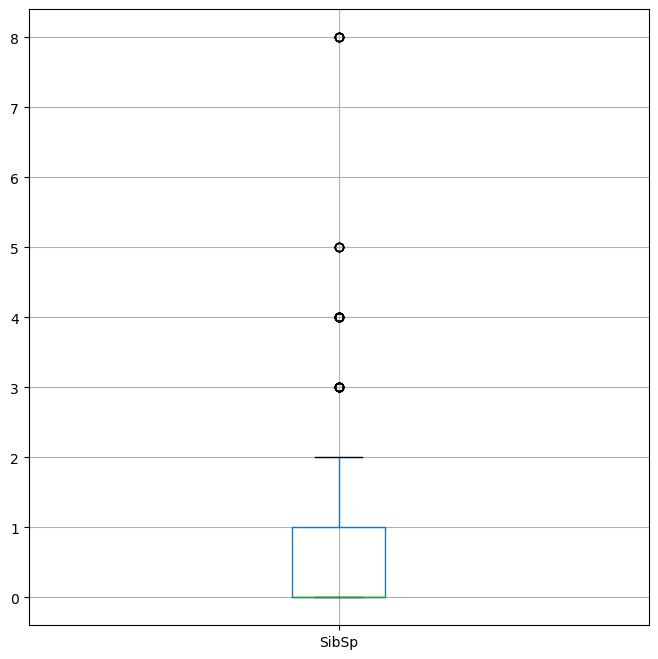

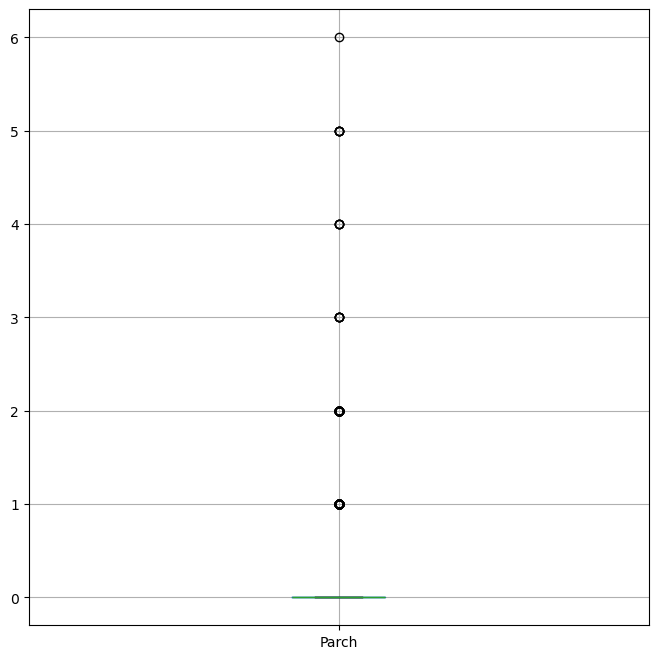

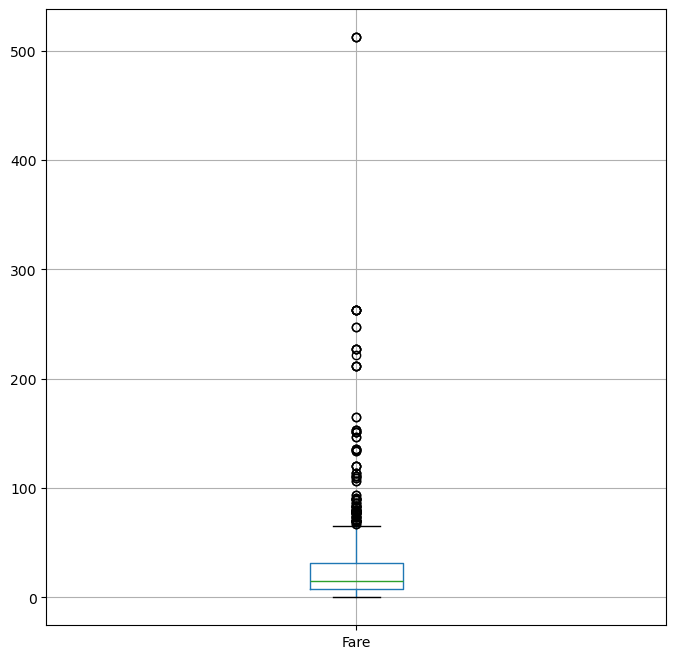

In [9]:

n=len(data_num_cols.columns)
for i in range (0,n):
    plt.figure(figsize=[8,8])
    data_num_cols.boxplot(column=[data_num_cols.columns[i]])
    plt.show()

In [10]:
print(data_new.isnull().sum())
median_age = data_new['Age'].median()
median_fare=data_new["Fare"].median()
data_new["Age"]=data_new["Age"].fillna(median_age)
data_new["Fare"]=data_new["Fare"].fillna(median_fare)
data_new.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
data_new['Deck'] = data_new['Cabin'].str[0]
data_new['Deck']=data_new['Deck'].fillna('U')
data_new['Deck']

0      U
1      C
2      U
3      C
4      U
      ..
886    U
887    B
888    U
889    C
890    U
Name: Deck, Length: 891, dtype: object

In [12]:
data_new['Family count']=data_new["SibSp"]+data_new["Parch"]+1
data_new['Family count']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family count, Length: 891, dtype: int64

In [13]:
data_new['Family count'].value_counts()

Family count
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [14]:
data_new=data_new.drop(["Cabin","SibSp","Parch"],axis=1)
data_new

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Family count
0,0,3,male,22.0,7.2500,S,U,2
1,1,1,female,38.0,71.2833,C,C,2
2,1,3,female,26.0,7.9250,S,U,1
3,1,1,female,35.0,53.1000,S,C,2
4,0,3,male,35.0,8.0500,S,U,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,U,1
887,1,1,female,19.0,30.0000,S,B,1
888,0,3,female,28.0,23.4500,S,U,4
889,1,1,male,26.0,30.0000,C,C,1


In [15]:
data_new=pd.get_dummies(data_new, columns=["Pclass","Sex","Deck","Embarked"],drop_first=True, dtype=int)
data_new

,Survived,Age,Fare,Family count,Pclass_2,Pclass_3,Sex_male,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,Embarked_Q,Embarked_S
0,0,22.0,7.2500,2,0,1,1,0,0,0,0,0,0,0,1,0,1
1,1,38.0,71.2833,2,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,0,0,0,0,0,0,0,1,0,1
3,1,35.0,53.1000,2,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,1,0,1,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,1,0,1,0,0,0,0,0,0,0,1,0,1
887,1,19.0,30.0000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
888,0,28.0,23.4500,4,0,1,0,0,0,0,0,0,0,0,1,0,1
889,1,26.0,30.0000,1,0,0,1,0,1,0,0,0,0,0,0,0,0


In [16]:
data_new.isnull().sum()

Survived        0
Age             0
Fare            0
Family count    0
Pclass_2        0
Pclass_3        0
Sex_male        0
Deck_B          0
Deck_C          0
Deck_D          0
Deck_E          0
Deck_F          0
Deck_G          0
Deck_T          0
Deck_U          0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [17]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Age           891 non-null    float64
 2   Fare          891 non-null    float64
 3   Family count  891 non-null    int64  
 4   Pclass_2      891 non-null    int64  
 5   Pclass_3      891 non-null    int64  
 6   Sex_male      891 non-null    int64  
 7   Deck_B        891 non-null    int64  
 8   Deck_C        891 non-null    int64  
 9   Deck_D        891 non-null    int64  
 10  Deck_E        891 non-null    int64  
 11  Deck_F        891 non-null    int64  
 12  Deck_G        891 non-null    int64  
 13  Deck_T        891 non-null    int64  
 14  Deck_U        891 non-null    int64  
 15  Embarked_Q    891 non-null    int64  
 16  Embarked_S    891 non-null    int64  
dtypes: float64(2), int64(15)
memory usage: 118.5 KB


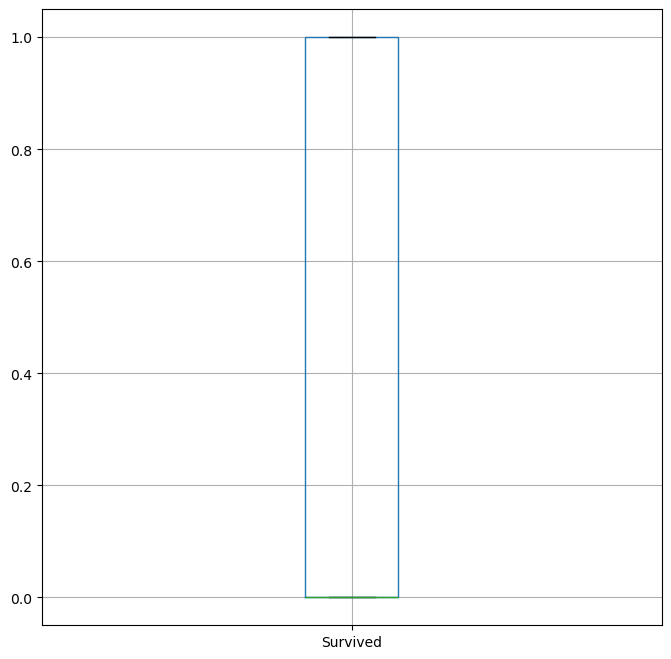

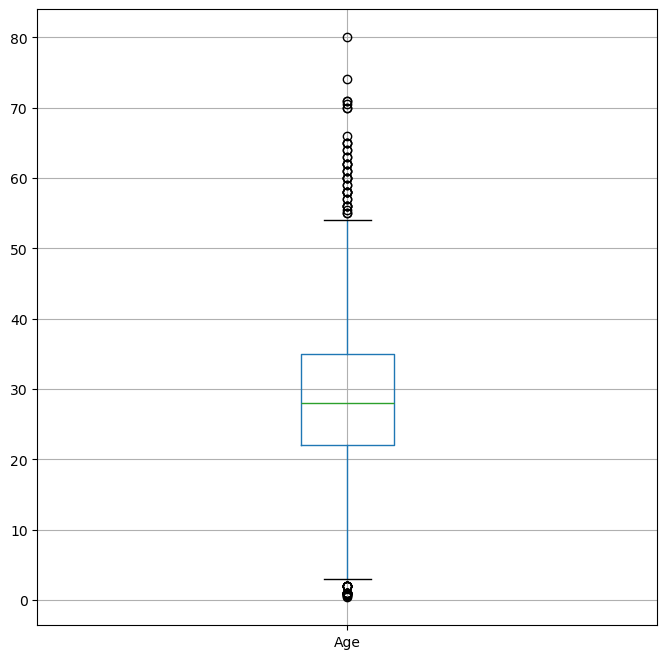

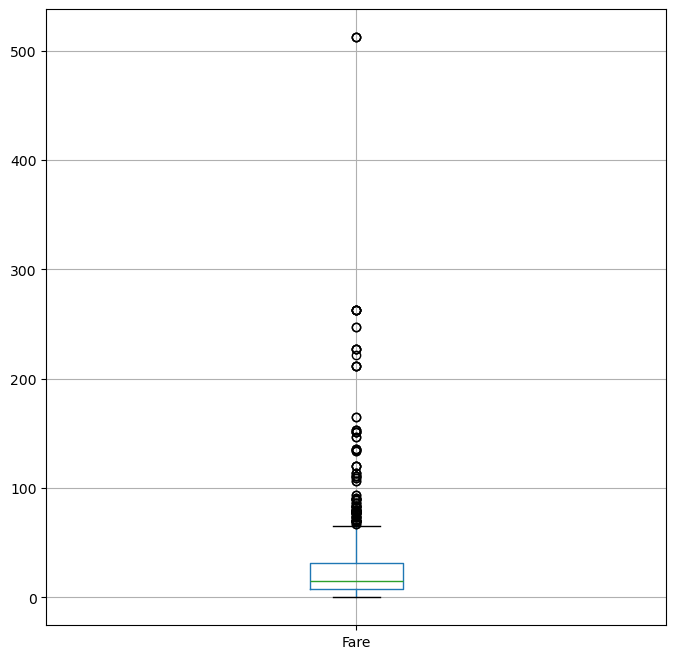

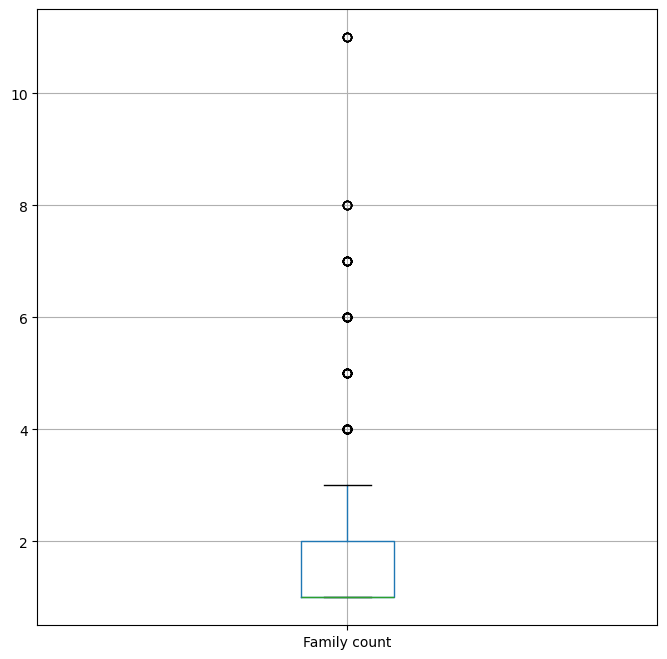

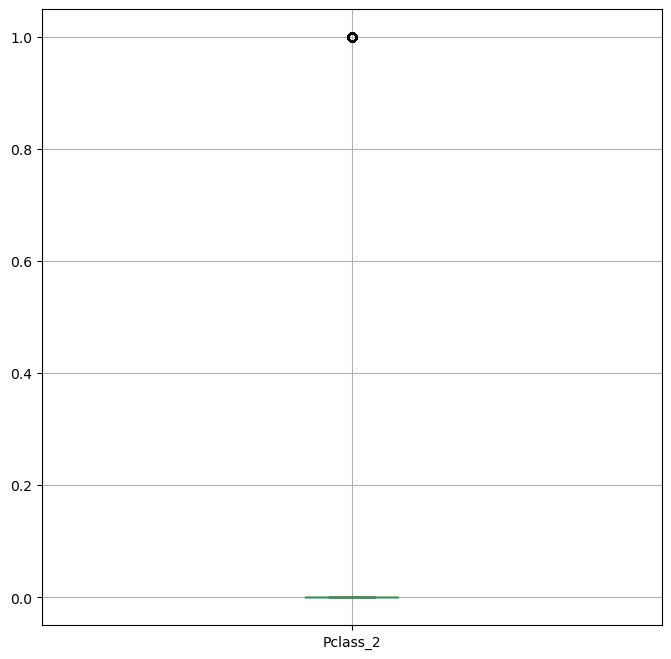

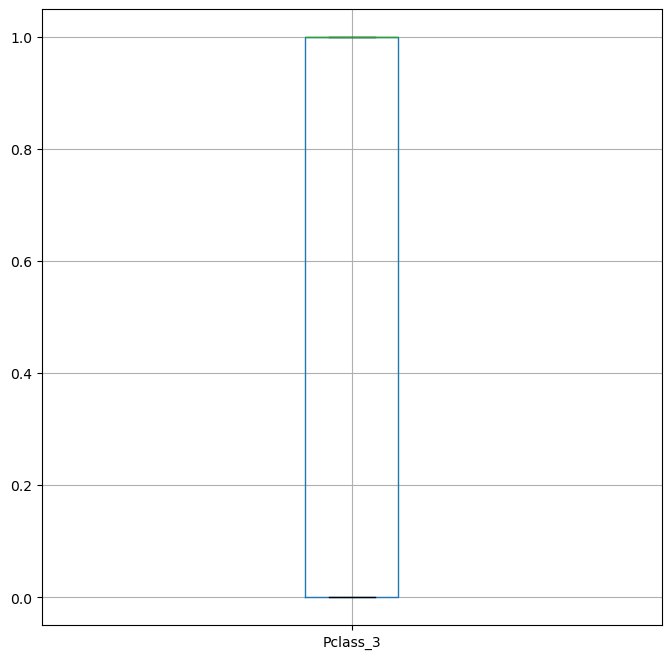

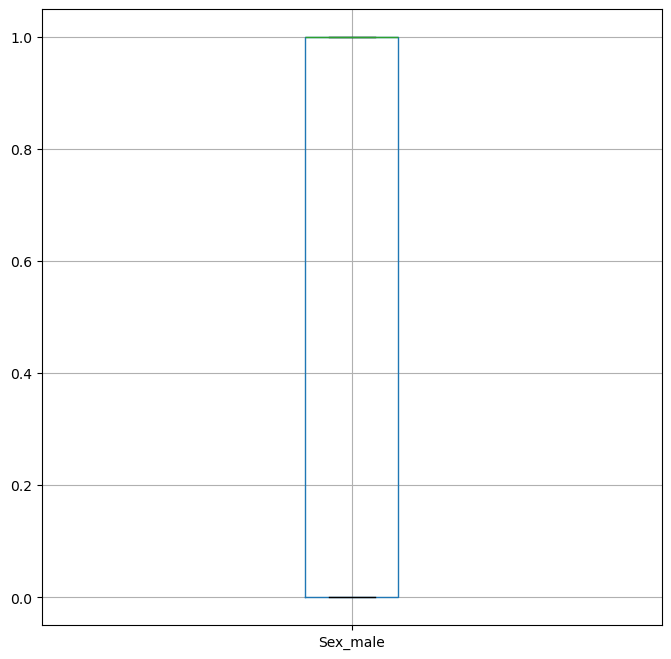

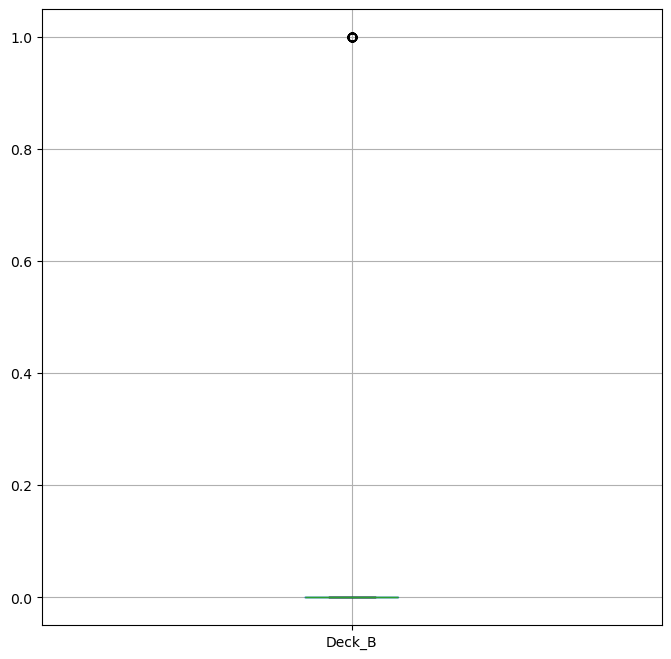

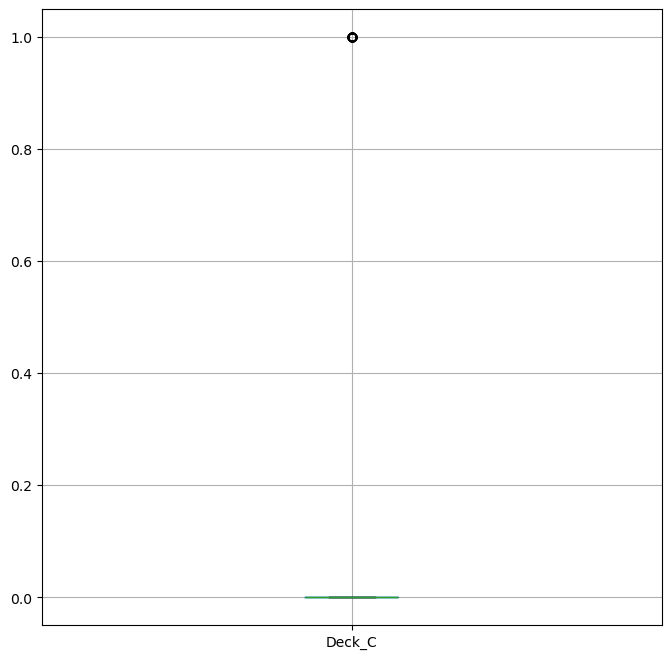

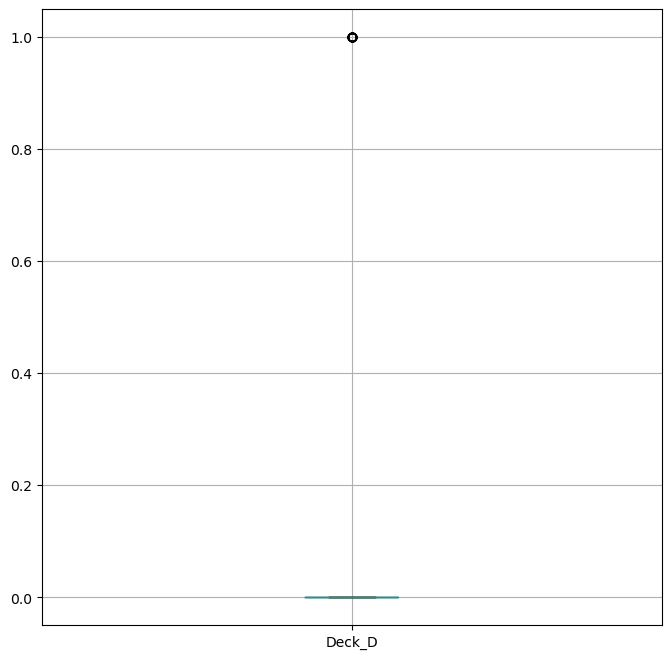

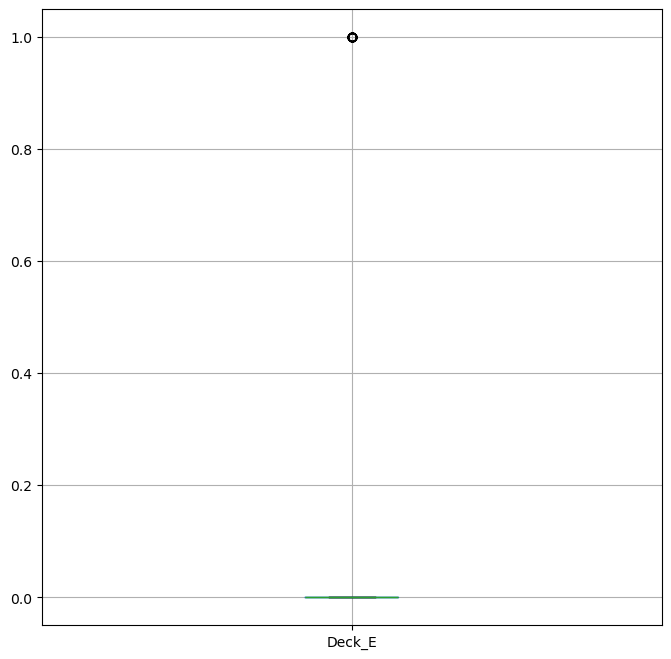

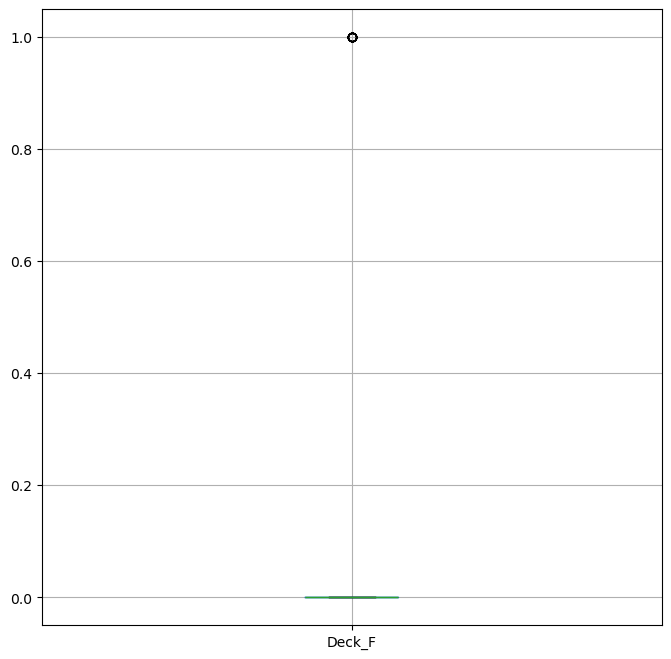

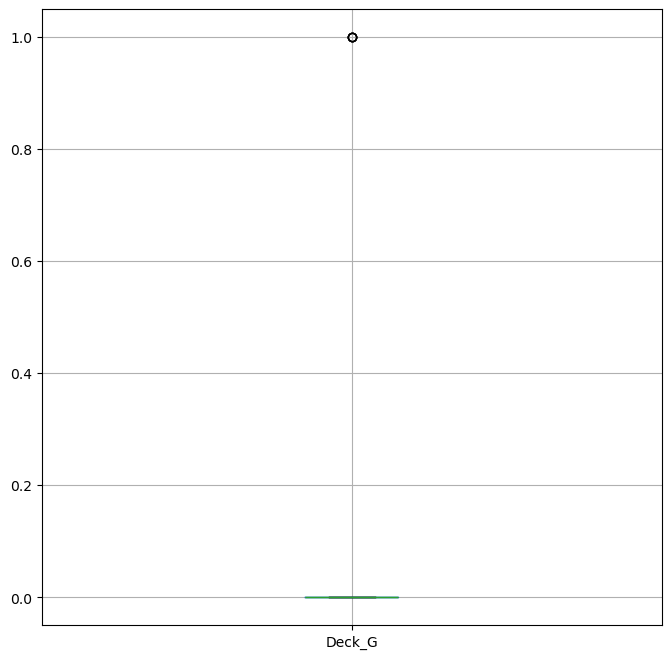

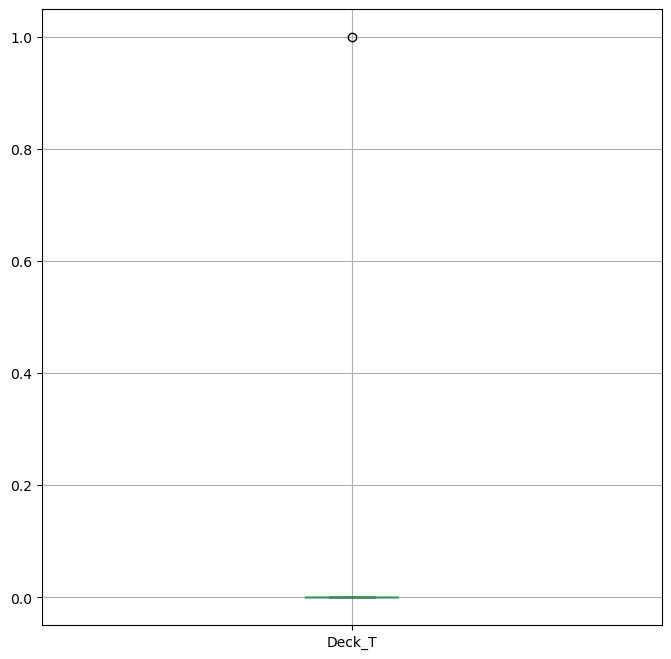

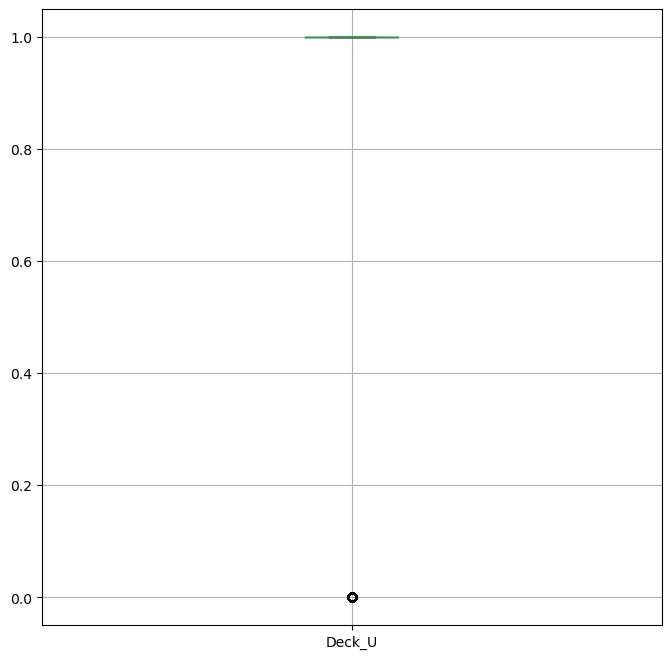

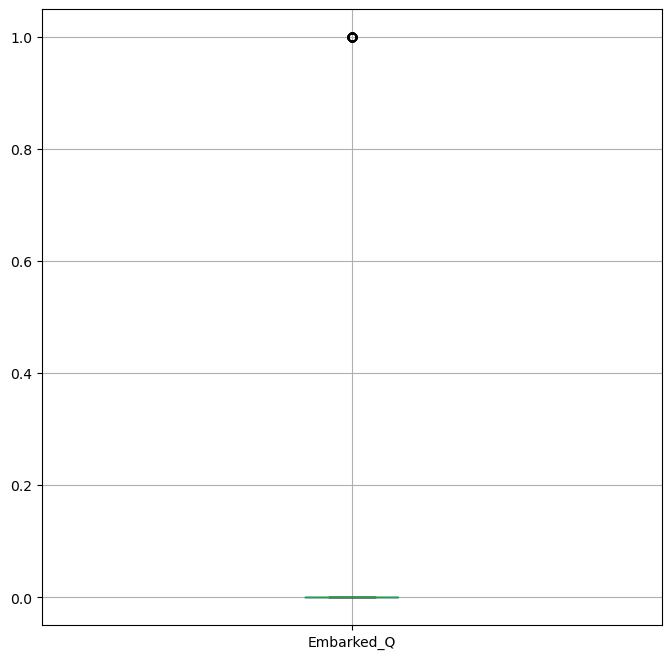

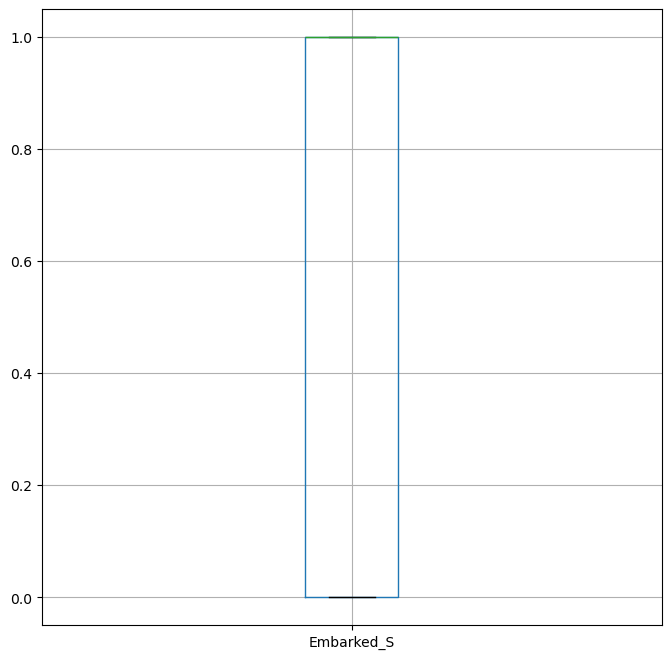

In [18]:
n=len(data_new.columns)
for i in range (0,n):
    plt.figure(figsize=[8,8])
    data_new.boxplot(column=[data_new.columns[i]])
    plt.show()

In [19]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [20]:
print(data_new.shape)
lr_age,ur_age=remove_outlier(data_new['Age'])
data_new['Age']=np.where(data_new['Age']>ur_age,ur_age,data_new['Age'])
data_new['Age']=np.where(data_new['Age']<lr_age,lr_age,data_new['Age'])

lrfare,urfare=remove_outlier(data_new['Fare'])
data_new['Fare']=np.where(data_new['Fare']>urfare,urfare,data_new['Fare'])
data_new['Fare']=np.where(data_new['Fare']<lrfare,lrfare,data_new['Fare'])

lrfamilycount,urfamilycount=remove_outlier(data_new['Family count'])
data_new['Family count']=np.where(data_new['Family count']>urfamilycount,urfamilycount,data_new['Family count'])
data_new['Family count']=np.where(data_new['Family count']<lrfamilycount,lrfamilycount,data_new['Family count'])

print(data_new.shape)

(891, 17)
(891, 17)


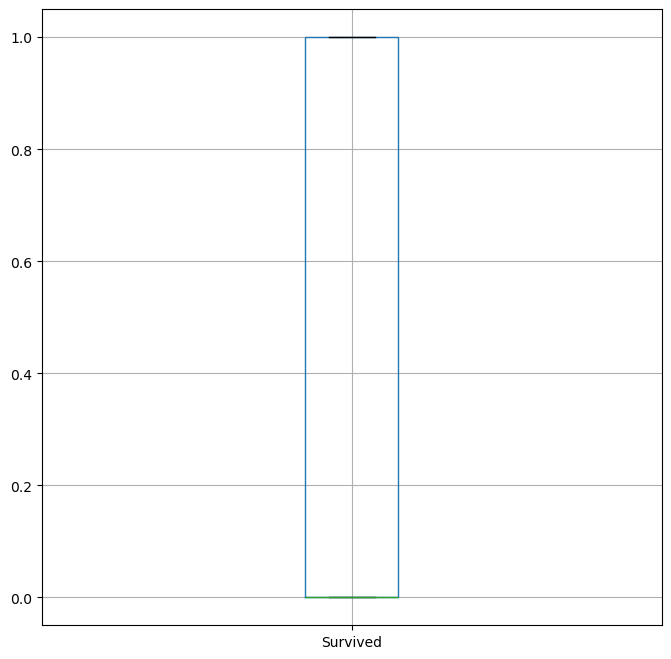

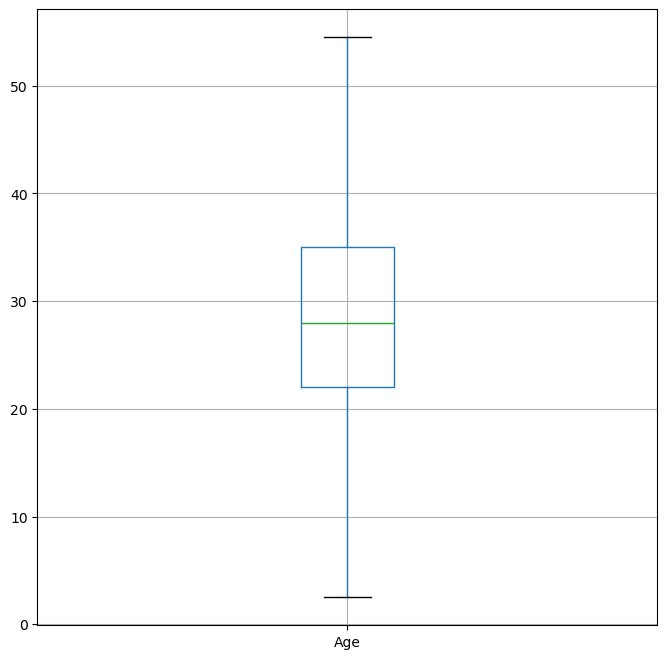

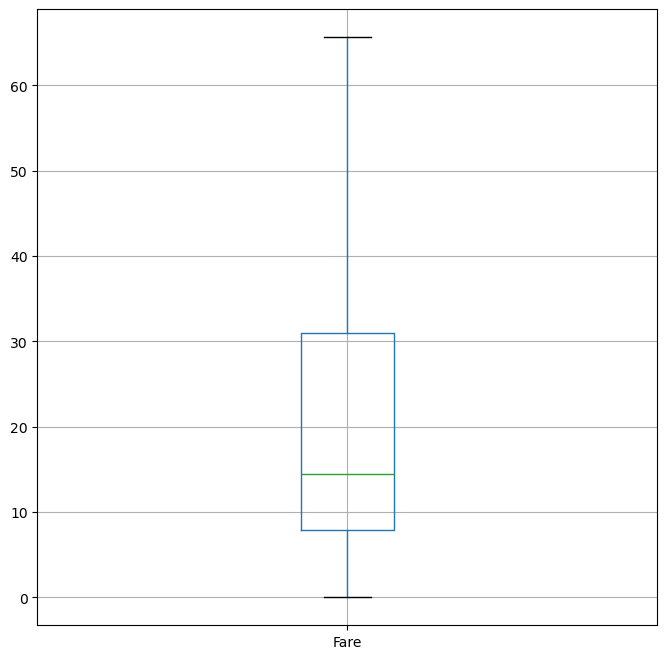

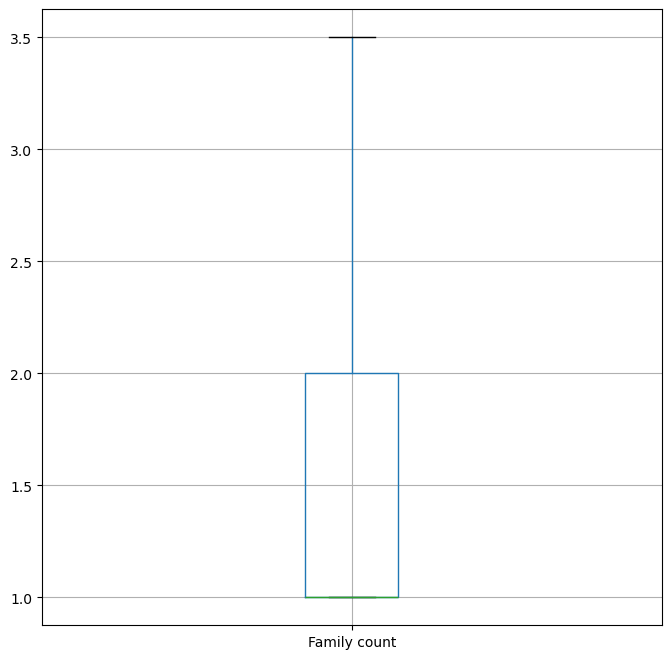

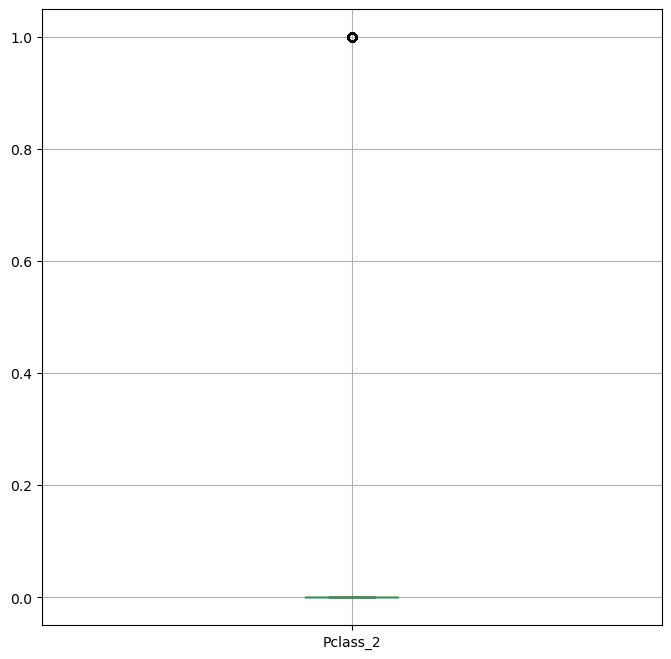

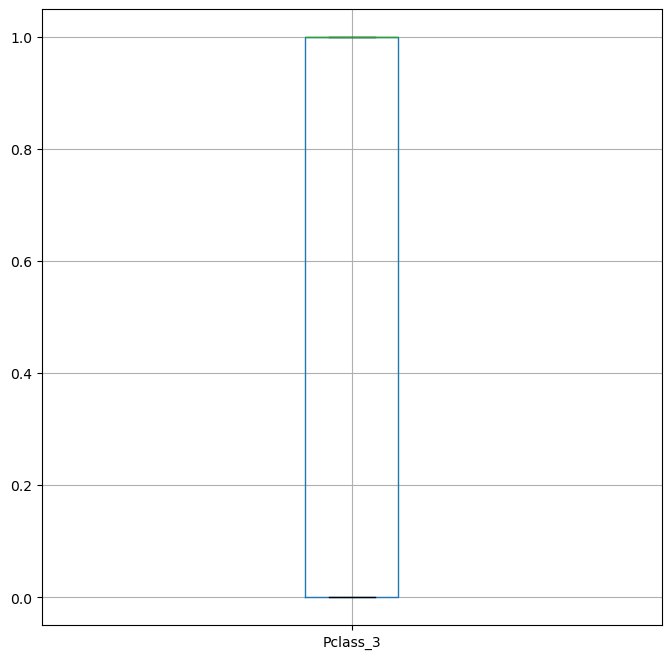

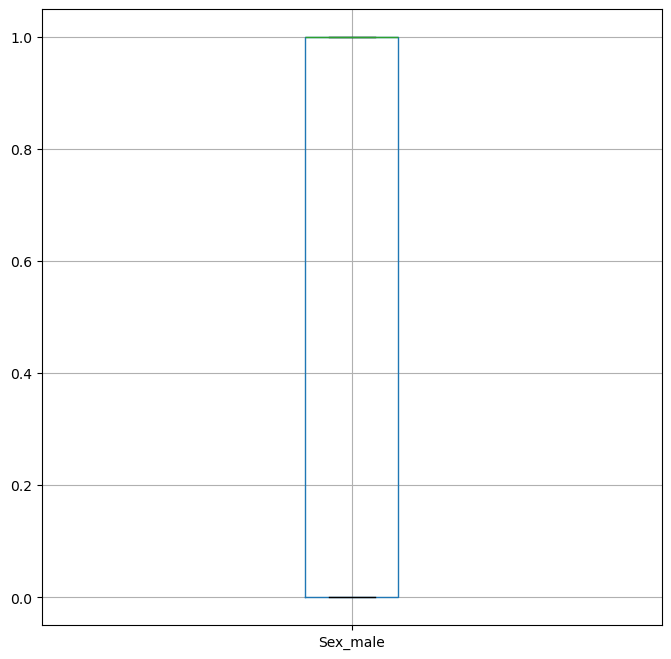

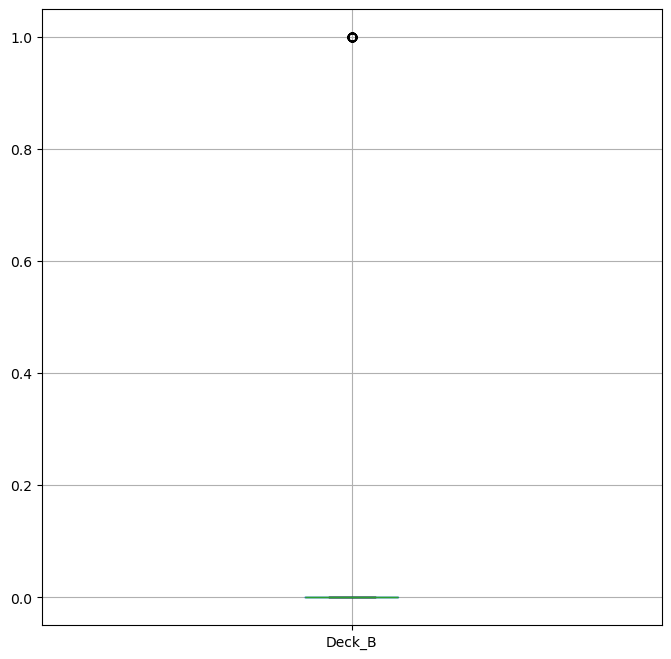

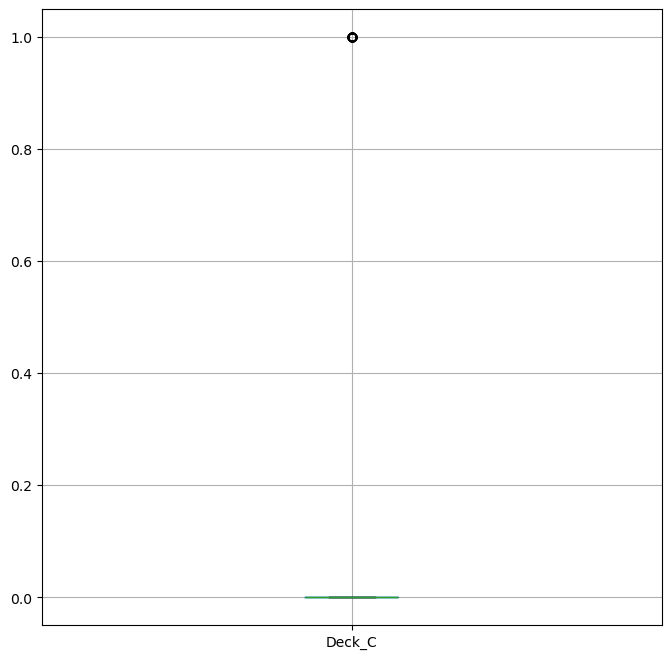

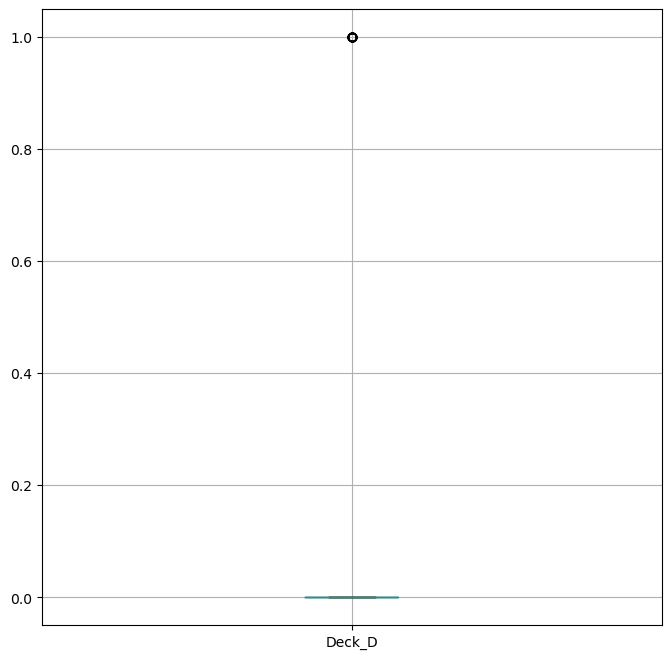

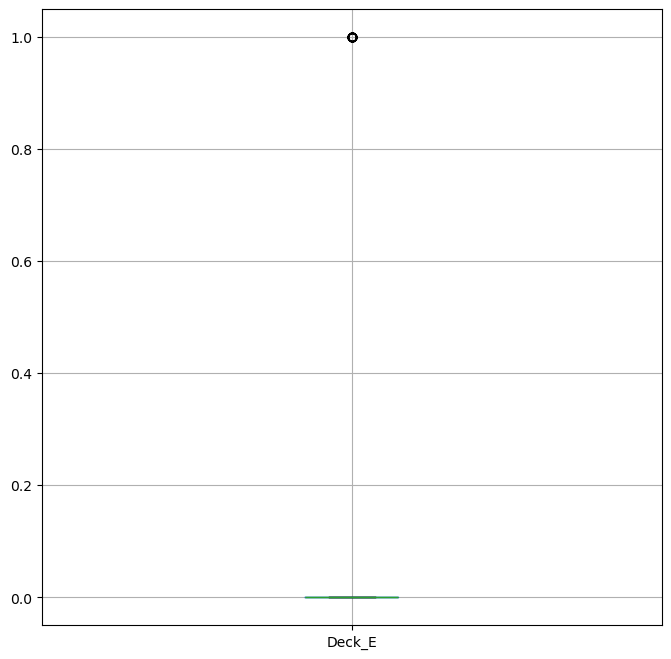

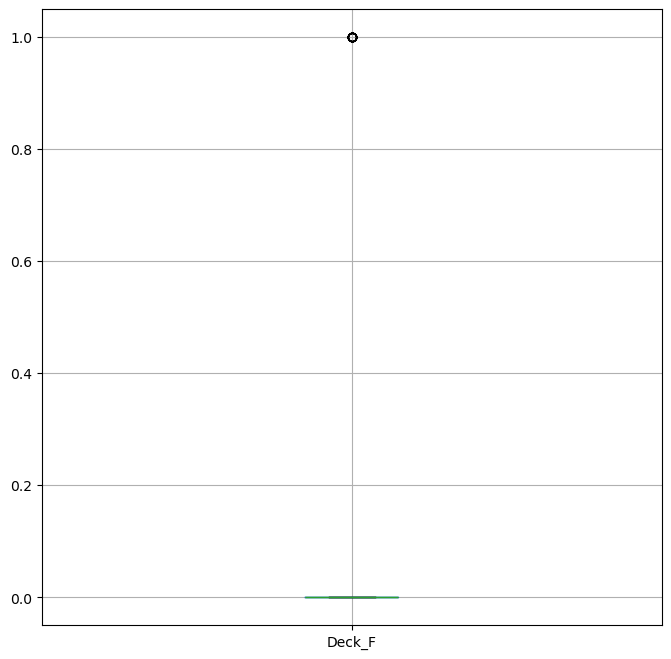

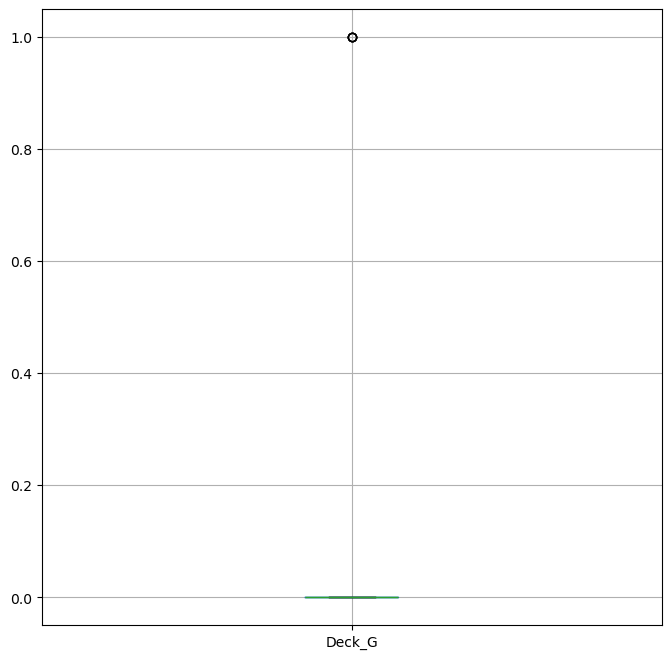

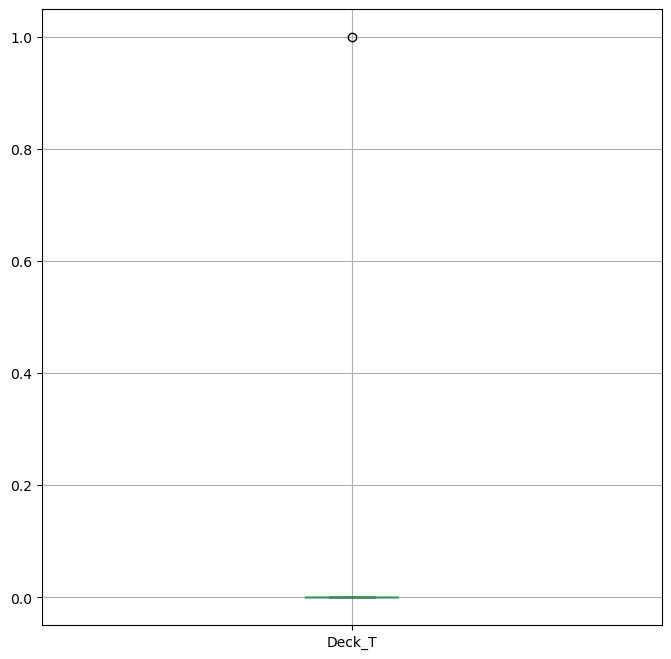

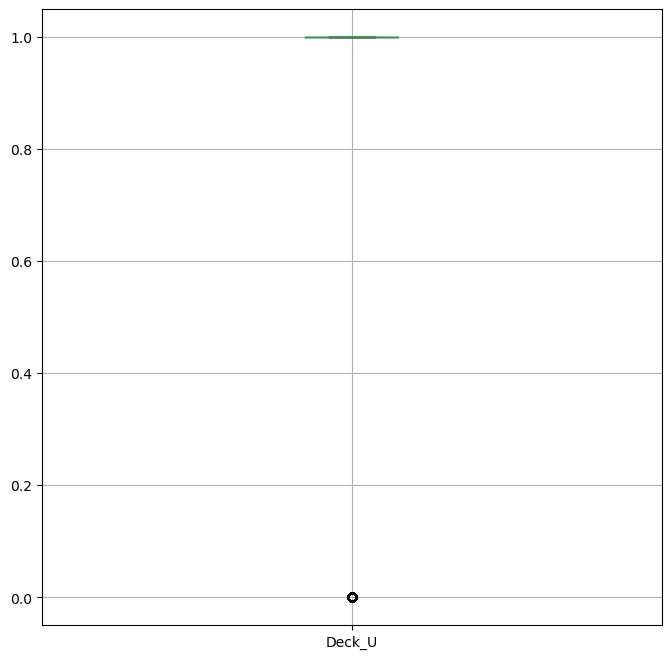

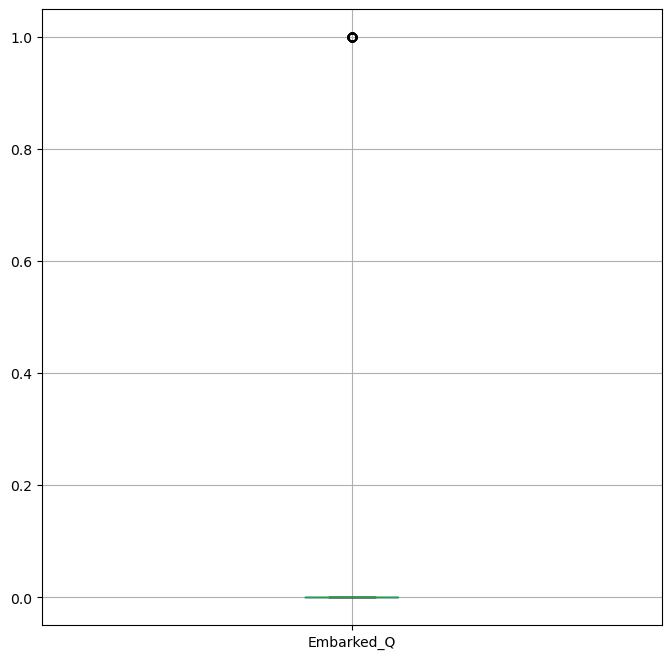

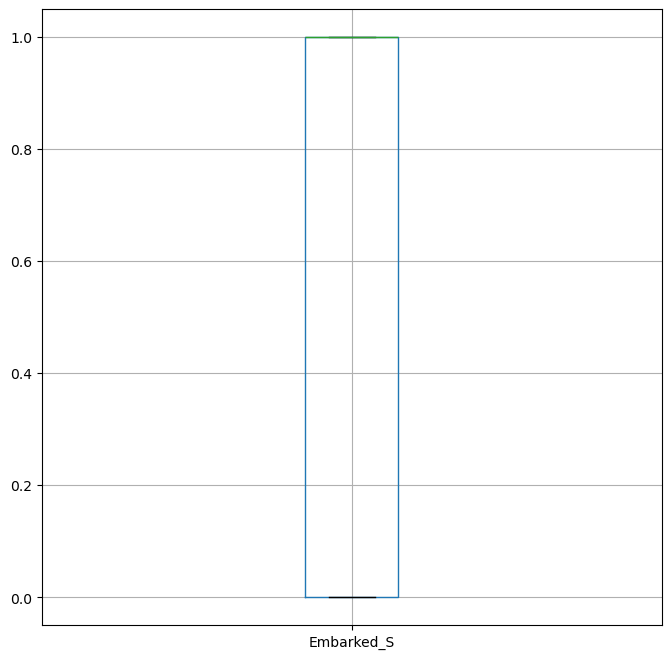

In [21]:
n=len(data_new.columns)
for i in range (0,n):
    plt.figure(figsize=[8,8])
    data_new.boxplot(column=[data_new.columns[i]])
    plt.show()

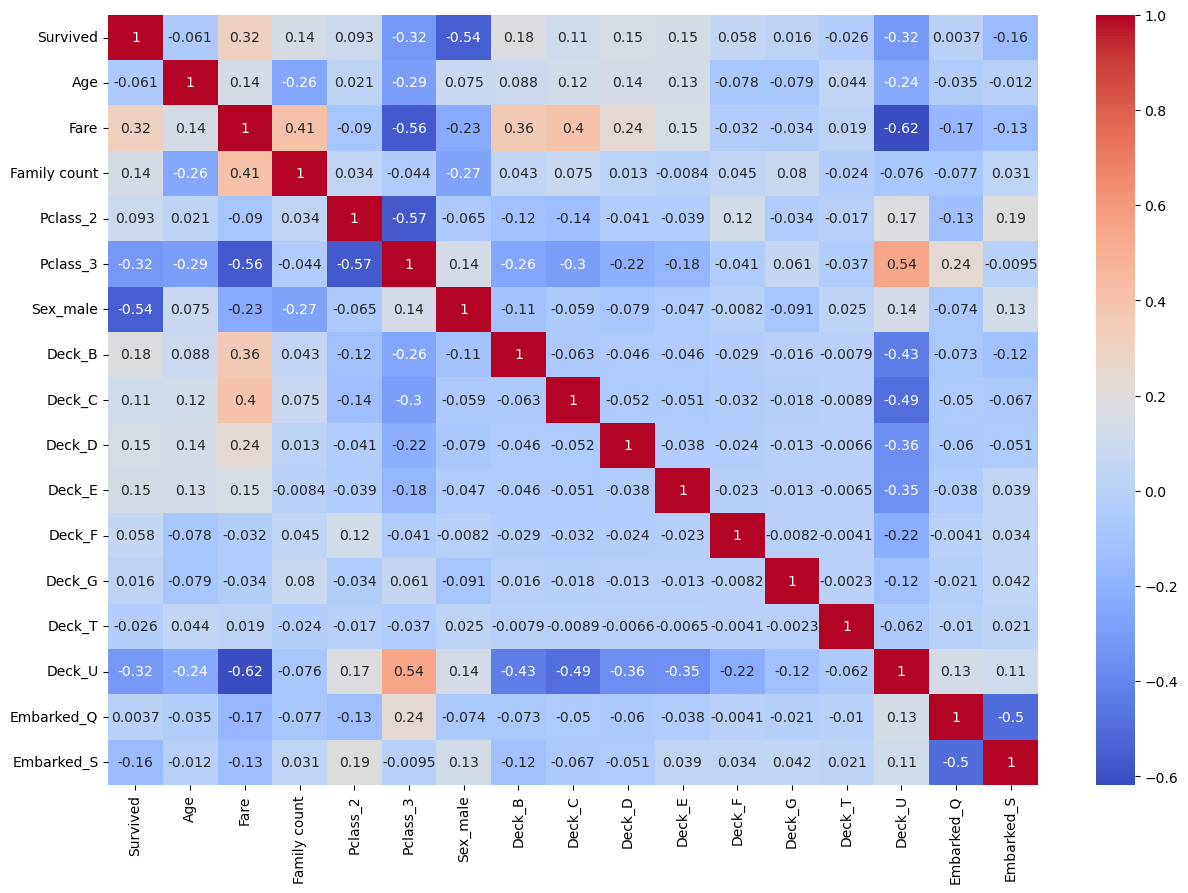

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data_new.corr(),annot=True,cmap='coolwarm')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=data_new.drop(["Survived"], axis=1)
Y=data_new[["Survived"]]

scalar=StandardScaler()

X_scaled=scalar.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled, columns=X.columns)

print(X)
print(X_scaled)

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled_df,Y,test_size=0.2,random_state=42)
print(len(X_test))
print(len(X_train))
print(len(Y_test))
print(len(Y_train))
print(X_train.head())

      Age     Fare  Family count  Pclass_2  Pclass_3  Sex_male  Deck_B  \
0    22.0   7.2500           2.0         0         1         1       0   
1    38.0  65.6344           2.0         0         0         0       0   
2    26.0   7.9250           1.0         0         1         0       0   
3    35.0  53.1000           2.0         0         0         0       0   
4    35.0   8.0500           1.0         0         1         1       0   
..    ...      ...           ...       ...       ...       ...     ...   
886  27.0  13.0000           1.0         1         0         1       0   
887  19.0  30.0000           1.0         0         0         0       1   
888  28.0  23.4500           3.5         0         1         0       0   
889  26.0  30.0000           1.0         0         0         1       0   
890  32.0   7.7500           1.0         0         1         1       0   

     Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_U  Embarked_Q  \
0         0       0       0       0 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

log_model=LogisticRegression()
log_model.fit(X_train,Y_train)

Y_pred=log_model.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
print(f"Precision score : {precision_score(Y_test, Y_pred)}")
print(f"Recall score : {recall_score(Y_test, Y_pred)}")
print(f"F1 score : {f1_score(Y_test, Y_pred)}")
print(f"ROC-AUC score : {roc_auc_score(Y_test, Y_pred)}")

Accuracy: 0.8044692737430168
Precision score : 0.7746478873239436
Recall score : 0.7432432432432432
F1 score : 0.7586206896551724
ROC-AUC score : 0.7954311454311453


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


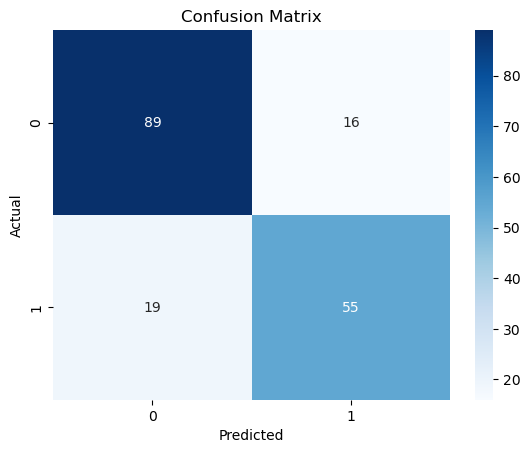

In [25]:
cm = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

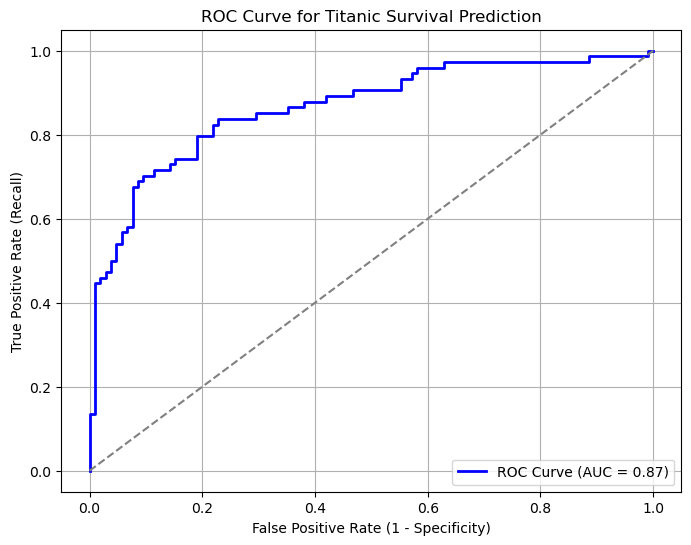

In [26]:
# 1. Get the probabilities for the positive class (Survived)
# [:, 1] takes the second column (probability of 1)
Y_probs = log_model.predict_proba(X_test)[:, 1]

# 2. Calculate the FPR, TPR, and Thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs)

# 3. Calculate AUC (Area Under Curve) for the legend
auc = roc_auc_score(Y_test, Y_probs)

# 4. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') # The "Random Guess" line
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Titanic Survival Prediction')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [27]:
print(log_model.coef_)

[[-0.37074512  0.10145538 -0.16196047  0.20617066 -0.39862128 -1.27469655
   0.14114512 -0.00312584  0.17261109  0.29286121  0.04182012 -0.12068848
  -0.1408431  -0.36466925 -0.07585686 -0.32953286]]


In [28]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_model.coef_[0]
})
coef_df

,Feature,Coefficient
0,Age,-0.370745
1,Fare,0.101455
2,Family count,-0.161960
3,Pclass_2,0.206171
4,Pclass_3,-0.398621
5,Sex_male,-1.274697
6,Deck_B,0.141145
7,Deck_C,-0.003126
8,Deck_D,0.172611
9,Deck_E,0.292861


In [29]:
import statsmodels.api as sm

# statsmodels requires adding a constant (intercept) manually
X_train_const = sm.add_constant(X_train)

# Fit the Logit model
model_sm = sm.Logit(Y_train, X_train_const).fit()

# View the summary table
print(model_sm.summary())

         Current function value: 0.437597
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                           16
Date:                Tue, 20 Jan 2026   Pseudo R-squ.:                  0.3393
Time:                        21:59:43   Log-Likelihood:                -311.57
converged:                      False   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 1.864e-58
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6594   2845.098     -0.000      1.000   -5576.949    5575.631
Age             -0.3790      0.112     -3.373      0.001   

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
import joblib

# Save the model to a file
joblib.dump(log_model, 'titanic_model.pkl')

# If you used a scaler (StandardScaler), save it too!
joblib.dump(scalar, 'scaler.pkl')

['scaler.pkl']